In [17]:
import json
import pandas as pd

test_results_path = 'test/test_stats.json'

# test_results = pd.io.json.read_json(test_results_path, orient='index')
# test_results

with open(test_results_path) as f:
    test_results = json.load(f)

print(test_results['num entries'])
del test_results['num entries']
# display(list(test_results.values()))
df = pd.DataFrame.from_records(list(test_results.values()))
df

14


,epochs,eval_acc,eval_start,eval_end,learning rate,lr,lr_factor,model,num_params,optimizer,test_acc,test_iter,test_mode,train_acc,train_batch_size,train_mode
0,0,75.996,600000,700000,0.1,0.1,0.1,recur_net_depth=84_width=8,9642384,adam,91.904,20,max_conf,99.960843,3000,default
1,0,76.375,600000,700000,0.1,0.1,0.1,recur_net_depth=84_width=8,9642384,adam,92.007,22,max_conf,99.956024,3000,default
2,0,76.384,600000,700000,0.1,0.1,0.1,recur_net_depth=84_width=8,9642384,adam,92.023,23,max_conf,99.944578,3000,default
3,0,76.352,600000,700000,0.1,0.1,0.1,recur_net_depth=84_width=8,9642384,adam,92.015,24,max_conf,99.924900,3000,default
4,0,57.787,600000,700000,0.1,0.1,0.1,ff_net_depth=88_width=8,198386064,adam,80.776,-1,default,96.656426,3000,default
5,0,58.849,600000,700000,0.1,0.1,0.1,ff_net_depth=92_width=8,207823248,adam,81.044,-1,default,96.676908,3000,default
6,0,61.302,600000,700000,0.1,0.1,0.1,ff_net_depth=84_width=8,188948880,adam,83.265,-1,default,99.943373,3000,default
7,0,57.787,600000,700000,0.1,0.1,0.1,ff_net_depth=88_width=8,198386064,adam,80.776,-1,default,96.656827,3000,default
8,0,58.849,600000,700000,0.1,0.1,0.1,ff_net_depth=92_width=8,207823248,adam,81.044,-1,default,96.672691,3000,default
9,0,75.996,600000,700000,0.1,0.1,0.1,recur_net_depth=84_width=8,9642384,adam,91.904,20,max_conf,99.961044,3000,default


In [3]:
# df['model'].str.slice(13,15)
df['model'].str.slice(16,18)

0    84
1    84
2    84
3    84
4    wi
5    wi
Name: model, dtype: object

/fs/clip-quiz/amao/miniconda3/envs/easy-to-hard/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


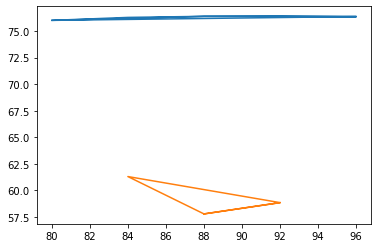

In [18]:
import matplotlib.pyplot as plt

ff_results = df[df['test_iter']==-1]
ff_results['effective_depth'] = ff_results['model'].str.slice(13,15).astype(int)

rnn_results = df[df['test_iter']>0]
# rnn_results['effective_depth'] = rnn_results['model'].str.slice(16,18)

plt.figure()
# plt.subplot(211)
plt.plot( 
         rnn_results['test_iter']*4, rnn_results['eval_acc'], 
         ff_results['effective_depth'], ff_results['eval_acc'],)


# rnn_results.plot('test_iter',['test_acc'])
# rnn_results.plot('test_iter',['eval_acc'])

In [5]:
# visualize the network output (heatmap)

# error analysis: what does it get right and wrong?

# get predictions



# test for more iterations



In [10]:
import argparse

parser = argparse.ArgumentParser(description="Deep Thinking")
parser.add_argument("--checkpoint", default="check_default", type=str,
                    help="where to save the network")
parser.add_argument("--data_path", default="../data", type=str, help="path to data files")
parser.add_argument("--depth", default=1, type=int, help="depth of the network")
parser.add_argument("--epochs", default=200, type=int, help="number of epochs for training")
parser.add_argument("--eval_end", default=700000, type=int, help="end index for eval data")
parser.add_argument("--eval_start", default=600000, type=int,
                    help="start index for eval data")
parser.add_argument("--hist", action="store_true", help="save histogram history?")
parser.add_argument("--lr", default=0.1, type=float, help="learning rate")
parser.add_argument("--lr_decay", default="step", type=str, help="which kind of lr decay")
parser.add_argument("--lr_factor", default=0.1, type=float, help="learning rate decay factor")
parser.add_argument("--lr_schedule", nargs="+", default=[100, 150], type=int,
                    help="how often to decrease lr")
parser.add_argument("--model", default="perceiver", type=str, help="model for training")
parser.add_argument("--model_path", default=None, type=str, help="where is the model saved?")
parser.add_argument("--no_shuffle", action="store_false", dest="shuffle",
                    help="shuffle training data?")
parser.add_argument("--optimizer", default="adam", type=str, help="optimizer")
parser.add_argument("--output", default="output_default", type=str, help="output subdirectory")
parser.add_argument("--quick_test", action="store_true", help="only test on eval data")
parser.add_argument("--save_json", action="store_true", help="save json")
parser.add_argument("--save_period", default=None, type=int, help="how often to save")
parser.add_argument("--test_batch_size", default=500, type=int, help="batch size for testing")
parser.add_argument("--test_iterations", default=None, type=int,
                    help="how many, if testing with a different number iterations")
parser.add_argument("--test_mode", default="default", type=str, help="testing mode")
parser.add_argument("--train_batch_size", default=128, type=int,
                    help="batch size for training")
parser.add_argument("--train_log", default="train_log.txt", type=str,
                    help="name of the log file")
parser.add_argument("--train_mode", default="default", type=str, help="training mode")
parser.add_argument("--val_period", default=20, type=int, help="how often to validate")
parser.add_argument("--warmup_period", default=5, type=int, help="warmup period")
parser.add_argument("--width", default=4, type=int, help="width of the network")

OUTPUT="test"
RNN_MODEL_PATH="checkpoints/recur/recur_net_sgd_depth=84_width=8_lr=0.01_batchsize=300_at109_epoch=119_1.pth"
args_str = f"--save_json --output {OUTPUT} --model recur_net --epochs 0 --width 8 --depth 84 --train_batch_size 3000 --test_batch_size 3000 --test_mode max_conf --model_path {RNN_MODEL_PATH} --test_iterations 20 --eval_start 600000 --eval_end 700000"
args = parser.parse_args(args_str.split())


In [32]:
# load data
eval_start=600000
eval_end=700000

# trainloader, testloader, evalloader = get_dataloaders(args.train_batch_size, args.test_batch_size, args.eval_start,
#                                                       args.eval_end, shuffle=args.shuffle)
chess_puzzles = ChessPuzzleDataset("./data", idx_start=eval_start, idx_end=eval_end, download=True)
evalloader = data.DataLoader(chess_puzzles, num_workers=0, batch_size=args.test_batch_size,
                                 shuffle=False, drop_last=False)
inputs, targets, who_moves = chess_puzzles[3]


Files already downloaded and verified
Custom data range using indices [600000, 700000].
b3r1k1/2p2ppp/p7/N1p5/8/Q2P1P2/PP2r1RP/R1B4K


In [69]:
from easy_to_hard_data import ChessPuzzleDataset
from easy_to_hard_plot import chess_board_to_str
import chess

from utils import train, test, OptimizerWithSched, load_model_from_checkpoint, \
    get_dataloaders, to_json, get_optimizer, to_log_file, now, get_model

import numpy as np
import torch
import torch.utils.data as data
import seaborn as sns

from dataclasses import dataclass

def make_heatmap(board, dim):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    sns.heatmap(board.reshape(dim, dim), ax=ax, cbar=False, linewidths=1, linecolor='white')
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])

    plt.show()

def plot_chess_puzzle_custom(inputs, targets, predictions, who_moves=False):

    dim = inputs.size(2)

    # We rotate targets here since the data comes in oriented with square A1 at
    # the bottom left of the board, so we reorient the targets to match the rotated
    # board if black is to move.
    if who_moves:
        targets = torch.rot90(targets, 2, [0, 1])
    
    board_str = chess_board_to_str(inputs, who_moves)
    print(board_str)
    board = chess.Board(board_str)
    mysvg = chess.svg.board(board, size=350, flipped=bool(who_moves))
    
    display(mysvg)
    
    print('target')
    make_heatmap(targets, dim)
    print('prediction')
    make_heatmap(predictions, dim)
        

#     tmp_str = ".easy_to_hard_data_plot_temp.svg"
#     with open(tmp_str, "w") as fh:
#         fh.write(mysvg)

#     drawing = svg2rlg(tmp_str)
#     renderPDF.drawToFile(drawing, f"input_{save_str[:-4]}.pdf")
#     os.remove(tmp_str)
    

# plot_chess_puzzle_custom(inputs, targets, None, who_moves)

In [39]:
print(inputs.shape)
print(targets, who_moves)

torch.Size([12, 8, 8]) tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0]]) tensor([1.])


In [ ]:
# load model from path if a path is provided
print(f"Loading model from checkpoint {args.model_path}...")
net, start_epoch, optimizer_state_dict = load_model_from_checkpoint(args.model,
                                                                    args.model_path,
                                                                    args.width,
                                                                    args.depth)
start_epoch += 1


net = torch.nn.DataParallel(net, device_ids=None)
# pytorch_total_params = sum(p.numel() for p in net.parameters())
# optimizer = get_optimizer(args.optimizer, net, args.lr)

In [58]:
# run on data, get accuracy

from tqdm import tqdm
import einops

net.module.iters = args.test_iterations
device = "cuda" if torch.cuda.is_available() else "cpu"


testloader=evalloader
# eval_acc = test(net, evalloader, args.test_mode, device)
# accuracy = eval(f"test_{mode}")(net, testloader, device)

# taken from test_max_conf

net.eval()
net.to(device)
correct = 0
total = 0
nm = net.module
with torch.no_grad():
    for inputs, targets, _ in tqdm(testloader, leave=False):

        inputs, targets = inputs.to(device), targets.to(device)
        net(inputs)
        confidence_array = torch.zeros(nm.iters, inputs.size(0))
        for i, thought in enumerate(nm.thoughts):
            if i < 8:
                continue
            thought_s = torch.nn.functional.softmax(thought.detach(), dim=1)
            confidence_array[i] = thought_s.max(dim=1)[0].sum([1, 2])

        exit_iter = confidence_array.argmax(0)
        outputs = nm.thoughts[exit_iter, torch.arange(nm.thoughts.size(1))].squeeze()

        tk = torch.topk(outputs[:, 1].view(-1, 64), 2, dim=1)[0].min(dim=1)[0]
        test = einops.repeat(tk, 'n -> n k', k=8)
        test = einops.repeat(test, 'n m -> n m k', k=8)
        outputs[:, 1][outputs[:, 1] < test] = -float("Inf")
        outputs[:, 0] = -float("Inf")
        predicted = outputs.argmax(1)
        correct += torch.amin(predicted == targets, dim=[1, 2]).sum().item()

        total += targets.size(0)
        
        # just keep a sample
        break

accuracy = 100.0 * correct / total
accuracy

78.86666666666666

In [59]:
print(predicted.shape, targets.shape)

torch.Size([3000, 8, 8]) torch.Size([3000, 8, 8])


In [60]:
# (predicted == targets).shape
is_correct = torch.amin(predicted == targets, dim=[1, 2])
is_correct
# for i in range(10):
#     display(predicted[i])

tensor([True, True, True,  ..., True, True, True], device='cuda:0')

In [61]:
# create lists of correctly answered puzzles and incorrectly answered ones

correct_puzzles, incorrect_puzzles = [], []

for i,board in enumerate(inputs):
    puzzle = {'board':board, 'target':targets[i], 'predicted':predicted[i]}
    if is_correct[i]:
        correct_puzzles.append(puzzle)
    else:
        incorrect_puzzles.append(puzzle)

print(len(correct_puzzles), len(incorrect_puzzles))

2366 634


q5k1/1R5p/2N1p3/8/3PPp2/P4K2/1Pn4P/8


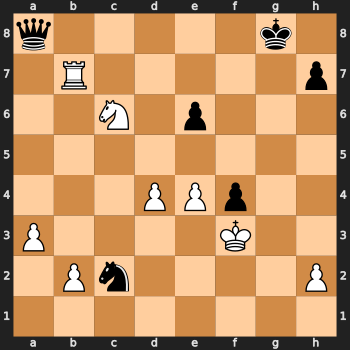

target


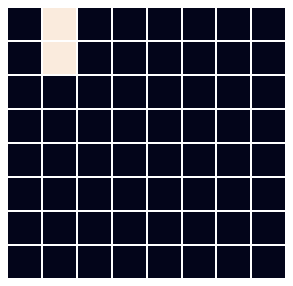

prediction


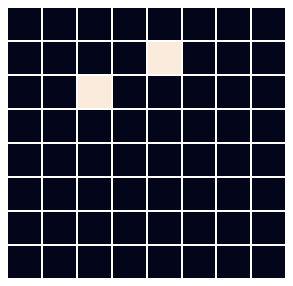

7k/R7/5N2/5P1p/5K2/1p6/8/q1r5


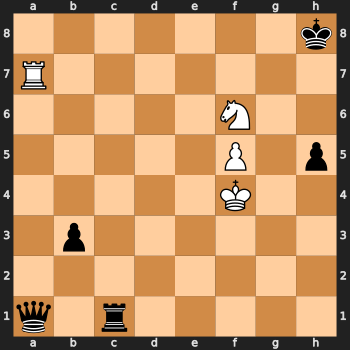

target


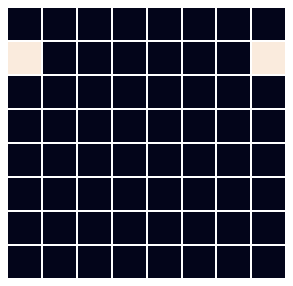

prediction


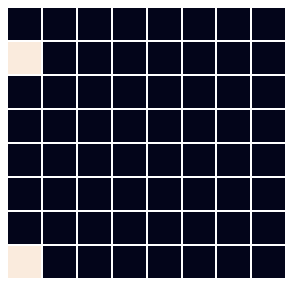

R4RK1/PP3PPP/4BN2/Q1pP2b1/3p4/4p3/p2qbppp/r3k2r


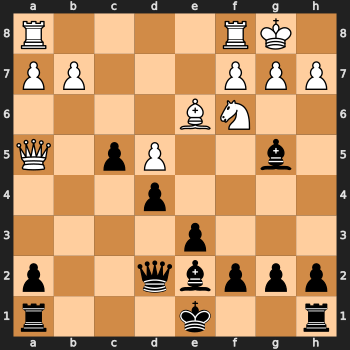

target


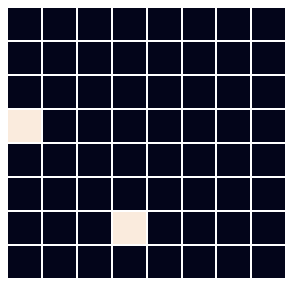

prediction


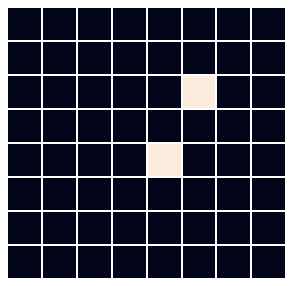

r2qkb1r/pp1nppp1/2p2n1p/8/4NP2/8/PPPPQ1PP/RNB2RK1


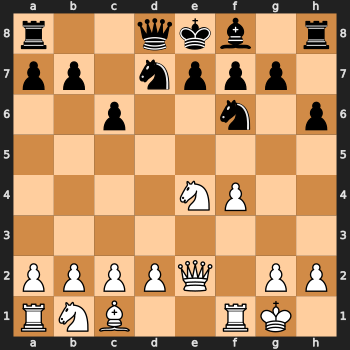

target


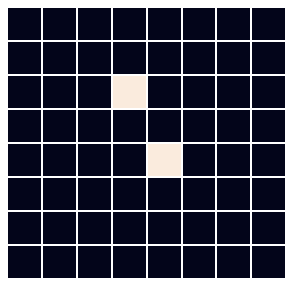

prediction


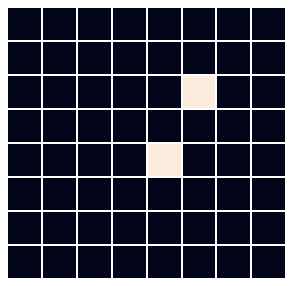

4b1k1/5pp1/5nNp/2Qp4/p7/P2B3P/1q3PP1/6K1


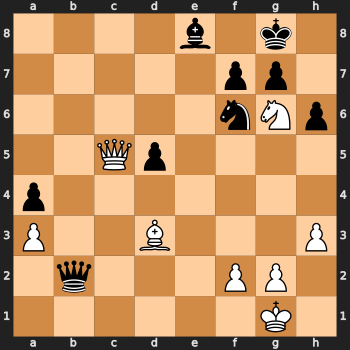

target


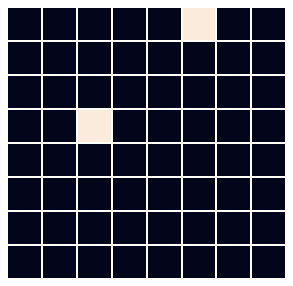

prediction


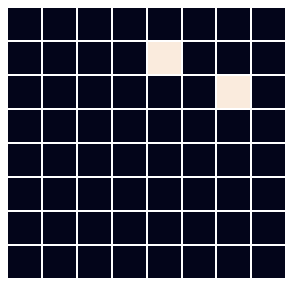

3R4/7P/3PKPP1/P1r5/P3p1p1/7p/2p5/1k1r4


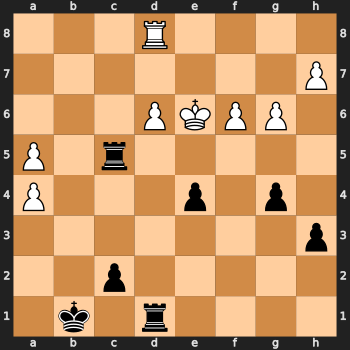

target


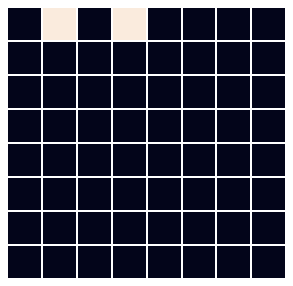

prediction


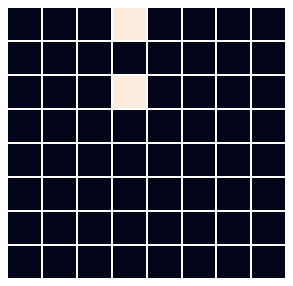

2kr4/1p4Qp/p4pp1/2p1P3/8/2P2B2/qP3PPP/5nK1


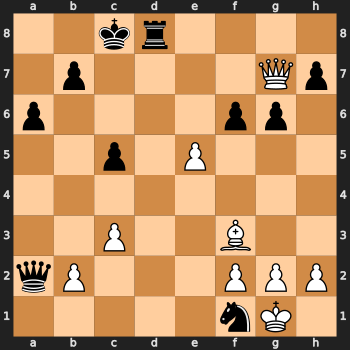

target


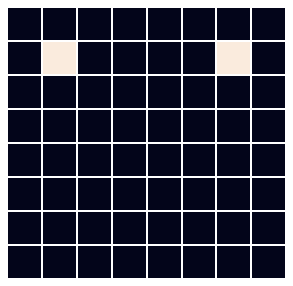

prediction


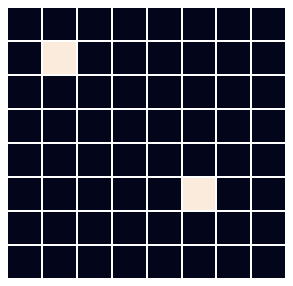

1rb1k2r/2p2pp1/2p1p2p/p2p4/1q1P2P1/1PnQ2PP/P2NP3/R3KBR1


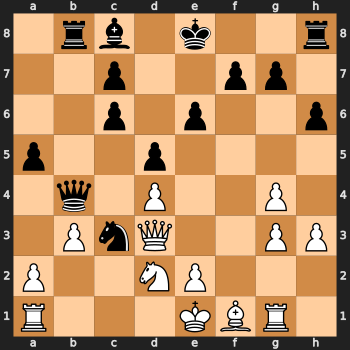

target


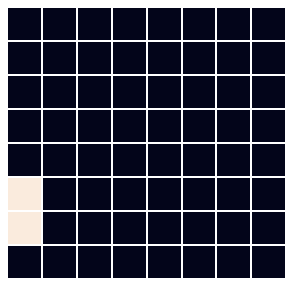

prediction


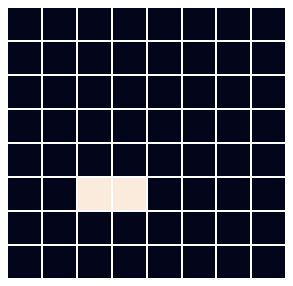

1rbqkb1r/p2n1ppp/2Q1pn2/8/5B2/2N5/PPP3PP/3RK1NR


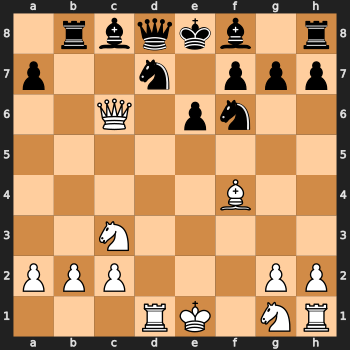

target


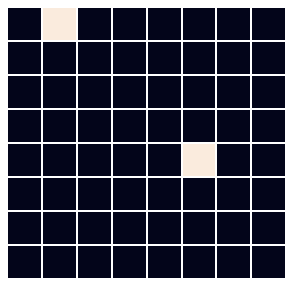

prediction


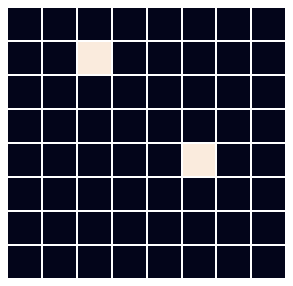

r1q1k1n1/pp2p1br/2p1b1N1/3p3n/3P1B2/2N1P3/PPP1QPP1/R3K2R


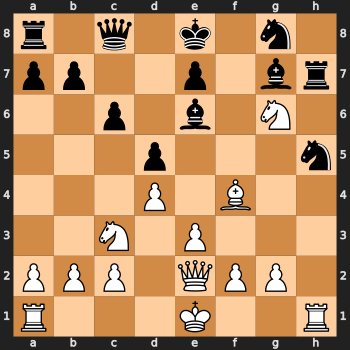

target


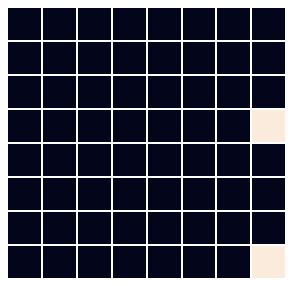

prediction


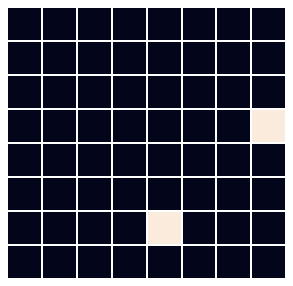

3R1R1K/3B2PP/P3n3/1P1q1p1Q/4p2p/8/ppp3b1/3r2k1


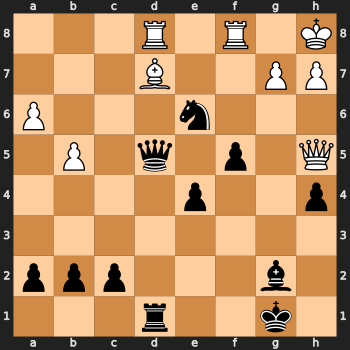

target


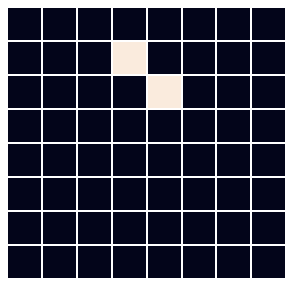

prediction


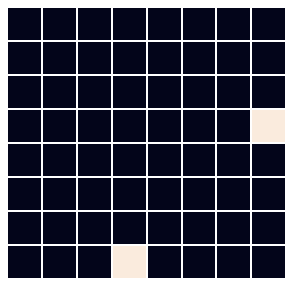

4rrk1/pp4p1/3b2qp/2nN1p2/2Q5/P3P3/1PR3PP/5RK1


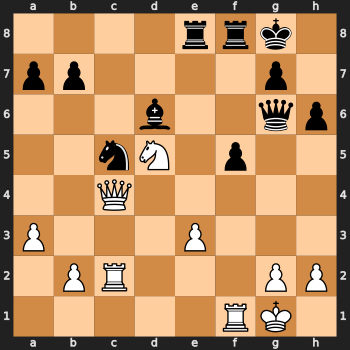

target


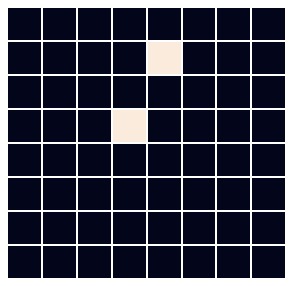

prediction


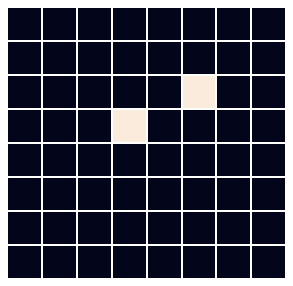

R3R1K1/P1Q2PBP/1Pq1B1P1/3Pn3/3b1p2/2p5/pp4pp/3r1rk1


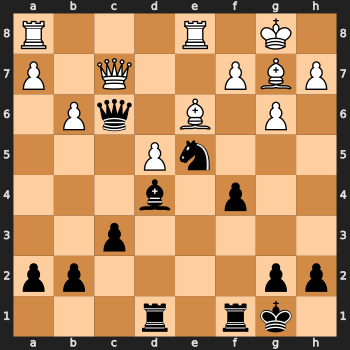

target


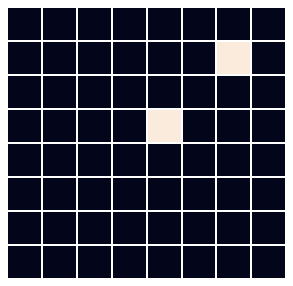

prediction


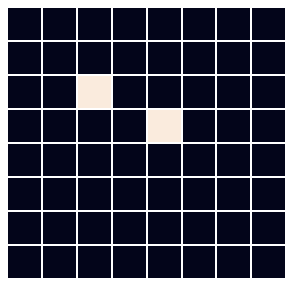

r3k1nr/pR3ppp/n1p1p3/8/2PPQ3/P4P2/3B1P1P/q3KB1R


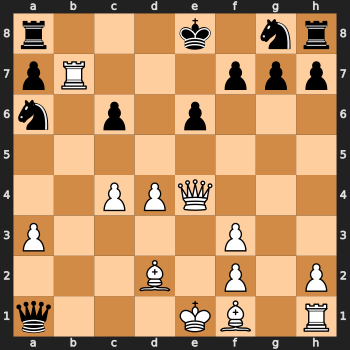

target


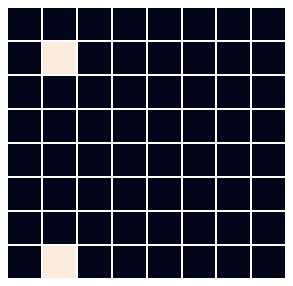

prediction


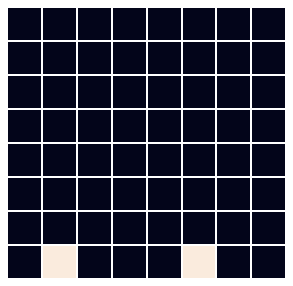

3r3k/pp3rpp/5q2/2P1n3/3B4/P1PB4/1P3P1Q/K6b


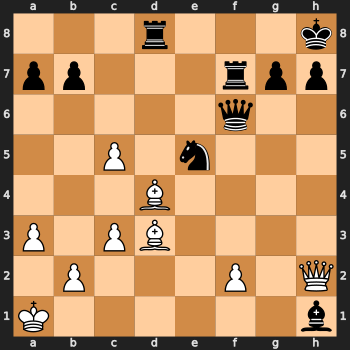

target


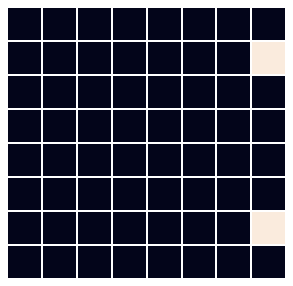

prediction


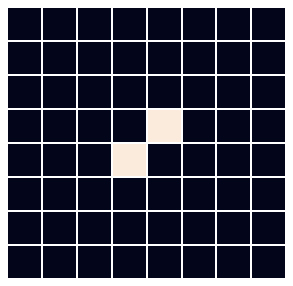

5RK1/1BBr1PP1/PbP2N1P/1P2Pp2/4p3/1pn1kn1p/1pp3p1/r7


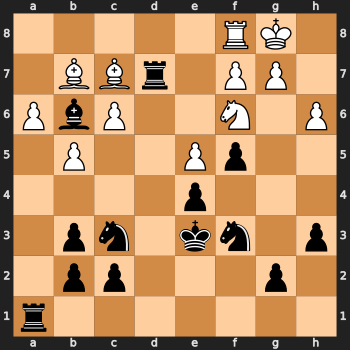

target


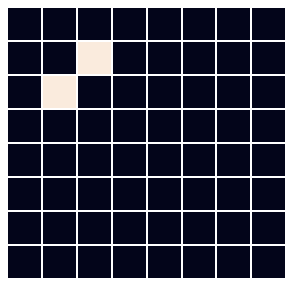

prediction


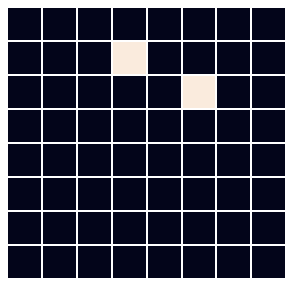

1r2rbk1/2p2ppp/p1p2pb1/2P5/1PNqp3/P6P/2Q2PP1/R3NRK1


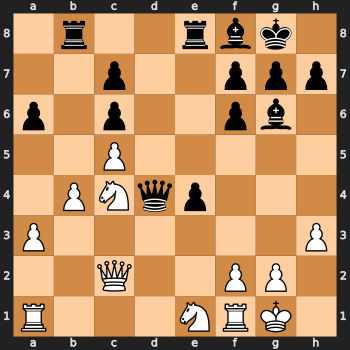

target


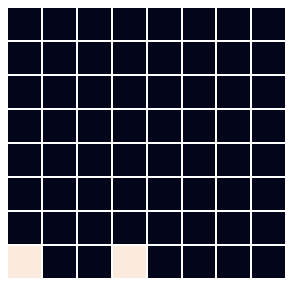

prediction


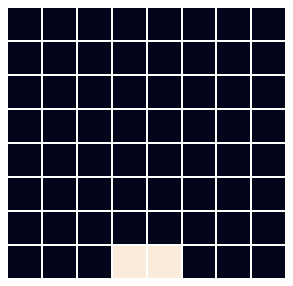

r4rk1/pp4pp/2p5/3b4/3qpB2/6QP/PP3PP1/R4RK1


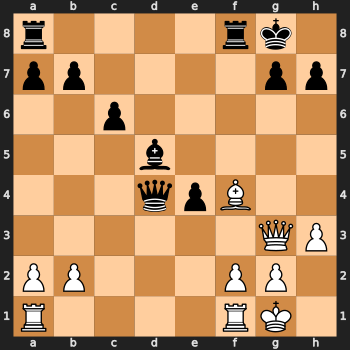

target


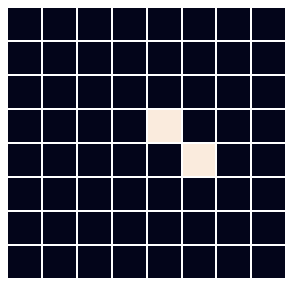

prediction


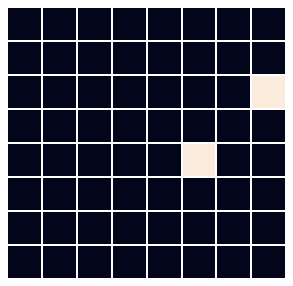

8/PP5P/4r1PK/5R2/7q/p1p2p2/1p3pkp/2Q5


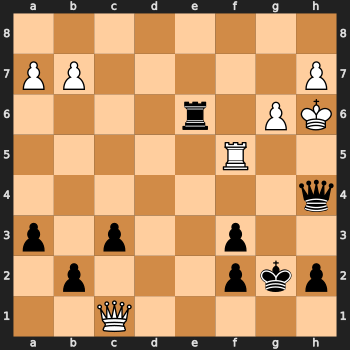

target


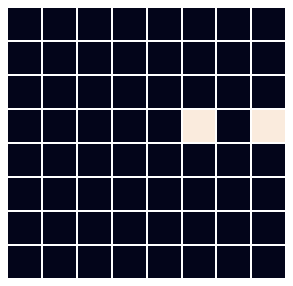

prediction


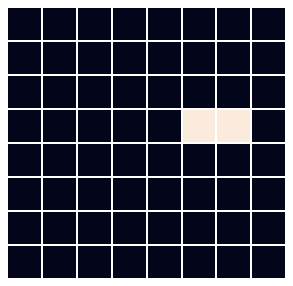

Q5rr/5pk1/5p2/4pq2/P2p2P1/1Pp2P1p/2P4P/R3R1K1


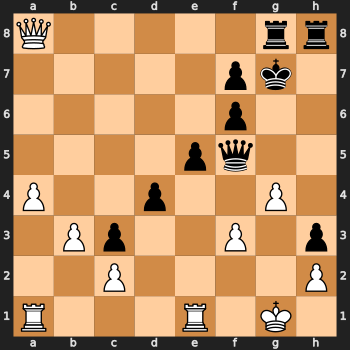

target


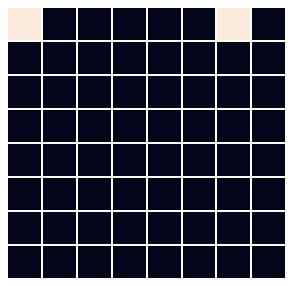

prediction


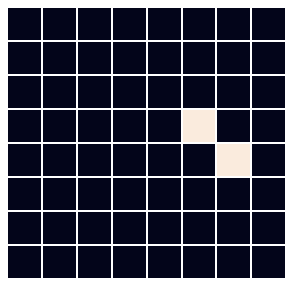

In [72]:

for i in range(20):
    puzzle = correct_puzzles[i]

    plot_chess_puzzle_custom(puzzle['board'].cpu(), puzzle['target'].cpu(), puzzle['predicted'].cpu())

torch.Size([1000, 12, 8, 8])